<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #1500ffff, #13079aff);
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Loan Status Prediction
    </h1>
</div>

<h4 style="color:#4183ffff">1. Importing Libraries: pandas, numpy, matplotlib, seaborn, sklearn.model_selection, sklearn.preprocessing, sklearn.svm, sklearn.metrics</h4>

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import r2_score,f1_score,accuracy_score

<h4 style="color:#4183ffff">2. Loading Dataset using pandas</h4>

In [401]:
loan_data=pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\Projects\Loan Status Prediction\Data\Loan Eligibility Dataset.csv")

<h4 style="color:#4183ffff">3. Displaying First Five Rows of the Dataset</h4>

In [402]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<h4 style="color:#4183ffff">4. Generating Descriptive Statistics of Numerical Features</h4>

In [403]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<h4 style="color:#4183ffff">5. Displaying Dataset Information (Data Types and Non-Null Counts)</h4>

In [404]:
loan_data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<h4 style="color:#4183ffff">6. Checking and Handling Missing Values in the Dataset</h4>

In [405]:
print(loan_data.shape)
print("--------------------------")
print(f"Number of missing values before dropping: {loan_data.isnull().sum().sum()}")
loan_data.dropna(inplace=True)
print("--------------------------")
print(loan_data.shape)
print("--------------------------")
print(f"Number of missing values after dropping: {loan_data.isnull().sum().sum()}")

(614, 13)
--------------------------
Number of missing values before dropping: 149
--------------------------
(480, 13)
--------------------------
Number of missing values after dropping: 0


<h4 style="color:#4183ffff">7. Encoding the 'Dependents' Column</h4>

In [406]:
print(loan_data['Dependents'].value_counts())
print("--------------------------")
loan_data['Dependents'] = loan_data['Dependents'].map({'0':0,'1':1,'2':2,'3+':4})
print(loan_data['Dependents'].value_counts())

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64
--------------------------
Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64


<h4 style="color:#4183ffff">8. Encoding the 'Loan_Status' Column</h4>

In [407]:
print(loan_data['Loan_Status'].value_counts())
print("--------------------------")
loan_data['Loan_Status']=loan_data['Loan_Status'].map({'N':0,'Y':1})
print(loan_data['Loan_Status'].value_counts())

Loan_Status
Y    332
N    148
Name: count, dtype: int64
--------------------------
Loan_Status
1    332
0    148
Name: count, dtype: int64


<h4 style="color:#4183ffff">9. Visualizing Loan Status Distribution by Education</h4>

Axes(0.125,0.11;0.775x0.77)


C:\Users\Rammah\AppData\Local\Temp\ipykernel_37816\1438831999.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:darkred'` for the same effect.

  print(sns.countplot(x='Education',hue='Loan_Status',data=loan_data,color='darkred'))


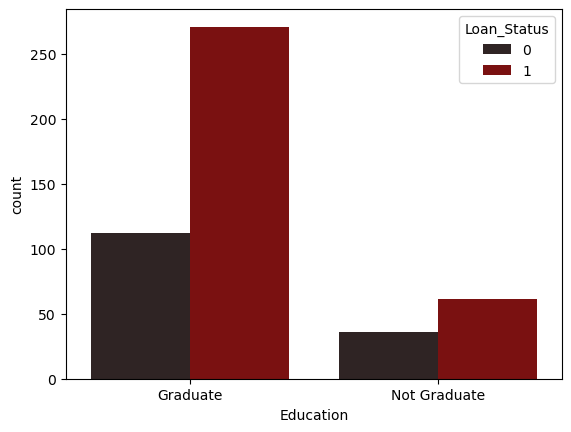

In [408]:
print(sns.countplot(x='Education',hue='Loan_Status',data=loan_data,color='darkred'))


<h4 style="color:#4183ffff">10. Visualizing Loan Status Distribution by Marital Status and Self Employment</h4>

C:\Users\Rammah\AppData\Local\Temp\ipykernel_37816\2191729494.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:brown'` for the same effect.

  x = sns.countplot(x='Married', hue='Loan_Status', data=loan_data, color='brown', ax=axes[0])
C:\Users\Rammah\AppData\Local\Temp\ipykernel_37816\2191729494.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:darkorange'` for the same effect.

  y = sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_data, color='darkorange', ax=axes[1])


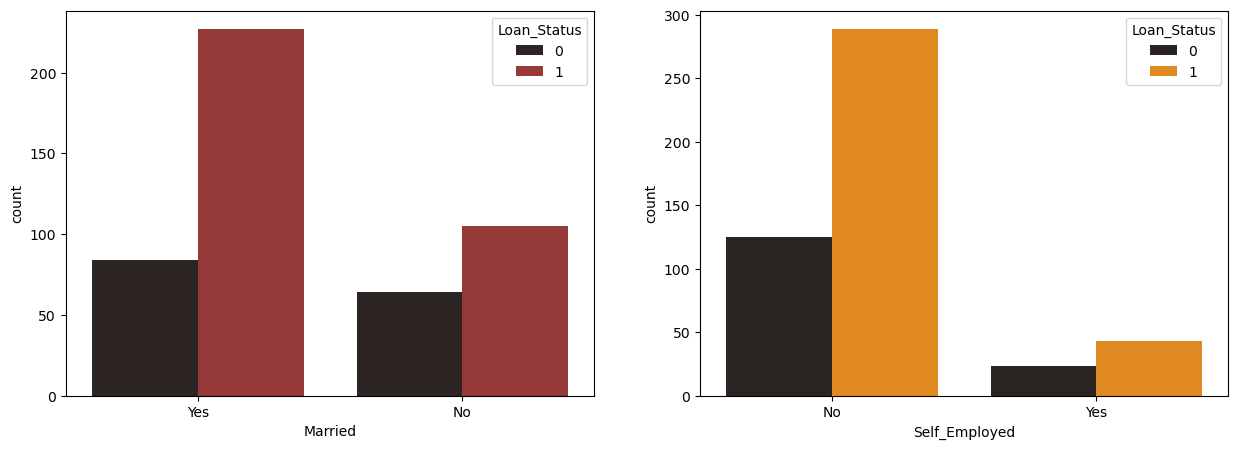

In [409]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
x = sns.countplot(x='Married', hue='Loan_Status', data=loan_data, color='brown', ax=axes[0])
y = sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_data, color='darkorange', ax=axes[1])

<h4 style="color:#4183ffff">11. Data Overview of Categorical Features Before Encoding</h4>

In [410]:
print("Data Overview Before encoding: ")
print(loan_data['Gender'].value_counts())
print(loan_data['Married'].value_counts())
print(loan_data['Education'].value_counts())
print(loan_data['Self_Employed'].value_counts())
print(loan_data['Property_Area'].value_counts())

Data Overview Before encoding: 
Gender
Male      394
Female     86
Name: count, dtype: int64
Married
Yes    311
No     169
Name: count, dtype: int64
Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64
Self_Employed
No     414
Yes     66
Name: count, dtype: int64
Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64


<h4 style="color:#4183ffff">12. Encoding Categorical Features into Numerical Values</h4>

In [411]:
loan_data['Gender'] = loan_data['Gender'].map({'Male': 0, 'Female': 1})
loan_data['Married'] = loan_data['Married'].map({'No': 0, 'Yes': 1})
loan_data['Education'] = loan_data['Education'].map({'Not Graduate': 0, 'Graduate': 1})
loan_data['Self_Employed'] = loan_data['Self_Employed'].map({'No': 0, 'Yes': 1})
loan_data['Property_Area'] = loan_data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})

<h4 style="color:#4183ffff">13. Data Overview of Categorical Features After Encoding</h4>

In [412]:
print("Data Overview After encoding: ")
print(loan_data['Gender'].value_counts())
print(loan_data['Married'].value_counts())
print(loan_data['Education'].value_counts())
print(loan_data['Self_Employed'].value_counts())
print(loan_data['Property_Area'].value_counts())

Data Overview After encoding: 
Gender
0    394
1     86
Name: count, dtype: int64
Married
1    311
0    169
Name: count, dtype: int64
Education
1    383
0     97
Name: count, dtype: int64
Self_Employed
0    414
1     66
Name: count, dtype: int64
Property_Area
1    191
2    150
0    139
Name: count, dtype: int64


<h4 style="color:#4183ffff">14. Correlation Heatmap of Features After Encoding</h4>

<Axes: >

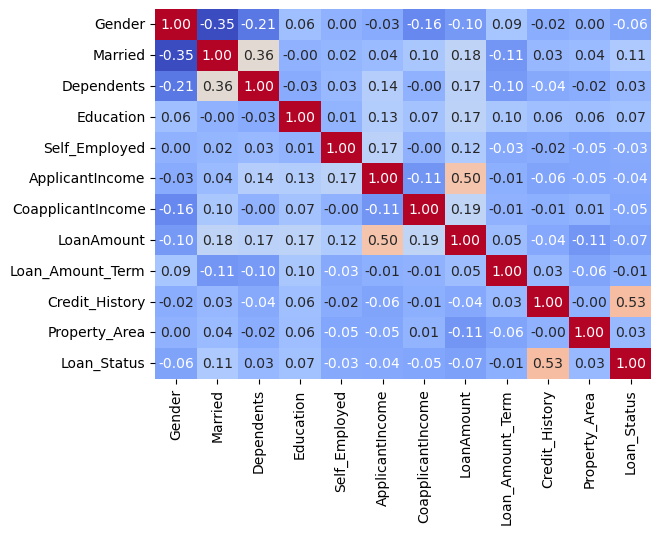

In [413]:
copy_loan_data = loan_data.copy()
copy_loan_data.drop(columns=['Loan_ID'], axis=1, inplace=True)
sns.heatmap(copy_loan_data.corr(), annot=True, cmap='coolwarm',fmt='.2f',cbar=False)

<h4 style="color:#4183ffff">15. Displaying First Five Rows After Data Preprocessing</h4>

In [414]:
print(loan_data.head())

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1  LP001003       0        1           1          1              0   
2  LP001005       0        1           0          1              1   
3  LP001006       0        1           0          0              0   
4  LP001008       0        0           0          1              0   
5  LP001011       0        1           2          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  
1             1.0              0            0  
2             1.0              2            1  
3       

<h4 style="color:#4183ffff">16. Splitting Dataset into Features, Target, Training Set, and Test Set</h4>

In [415]:
X=loan_data.drop(columns=['Loan_Status','Loan_ID'], axis=1)
Y=loan_data['Loan_Status']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

<h4 style="color:#4183ffff">17. Feature Scaling using StandardScaler</h4>

In [416]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

<h4 style="color:#4183ffff">18. Training Support Vector Machine (SVM) Model with Linear Kernel</h4>

In [417]:
Model=SVC(kernel='linear')
Model.fit(X_train,Y_train)

SVC(kernel='linear')

<h4 style="color:#4183ffff">19. Evaluating Model Performance on Training and Test Data</h4>

In [418]:
Modelpredictxtrain=Model.predict(X_train)
accuracyscore=accuracy_score(Y_train,Modelpredictxtrain)
print(f"Accuracy Score (Train): {accuracyscore:.2f}")
print('--------------------------')
Modelpredictxtest=Model.predict(X_test)
accuracyscore=accuracy_score(Y_test,Modelpredictxtest)
print(f"Accuracy Score (Test): {accuracyscore:.2f}")

Accuracy Score (Train): 0.80
--------------------------
Accuracy Score (Test): 0.82


<h4 style="color:#4183ffff">20. Making a Sample Prediction for Loan Eligibility</h4>

In [419]:
x=(1,1,0,1,3000,0,66,360,1,2,1) #After cleaning
x=np.array(x).reshape(1,-1)
prediction=Model.predict(x)
if(prediction[0]==0):
    print("The person is not eligible for loan")
else:
    print("The person is eligible for loan")

The person is eligible for loan
